In [88]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale

In [72]:
def read_score(file_path):
    with open(file_path, 'r') as file:
    # Read all lines and strip newline characters
        rewards = [float(line.strip()) for line in file]
    return rewards

In [79]:
humanoid_113k = read_score('models/Humanoid-v4/113k ep/scores.txt')

In [101]:
def plot_rewards(rewards, window=100, title='Rewards'):
    # Compute the rolling average of rewards
    average_y_q = [np.mean(rewards[i:i+window]) for i in range(len(rewards) - window + 1)]

    # Pad the beginning of the average_y_q list with NaNs to maintain the same length as rewards
    average_y_q = [np.nan] * (window - 1) + average_y_q
    
    # average_y_q = minmax_scale(average_y_q)
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(np.arange(len(rewards)), average_y_q, color='blue', label='ddpg')

    # plt.yticks([0, 1])
    plt.grid()
    plt.xlabel('Episodes')
    plt.ylabel(f'Average over {window} episodes')
    plt.title(title)
    plt.legend()
    plt.savefig('b.png')
    plt.show()

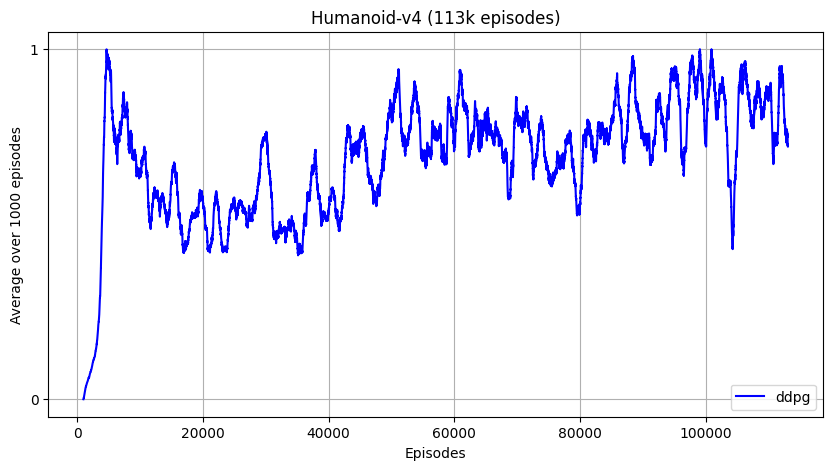

In [82]:
plot_rewards(humanoid_113k, title='Humanoid-v4 (113k episodes)', window=1000)

In [112]:
humanoid_ddpg_score_10k = read_score('models/Humanoid-v4/10k ep/scores.txt')
humanoid_ddpg_score_10k = humanoid_ddpg_score_10k[:10000]
humanoid_sac_score_10k = read_score('humanoid_scores.txt')
humanoid_sac_score_10k = humanoid_sac_score_10k[:10000]

In [116]:
max(humanoid_ddpg_score_10k), max(humanoid_sac_score_10k)

(4722.243074408812, 597.3238579280959)

In [117]:
count = 0
for i in range(10000):
    if humanoid_ddpg_score_10k[i] > humanoid_sac_score_10k[i]:
        count += 1
        
print(count)

8947


In [108]:
def plot_compare_rewards(rewards_ddpg, rewards_sac, window=100, title='Rewards'):
    average_ddpg = [np.mean(rewards_ddpg[i:i+window]) for i in range(len(rewards_ddpg) - window + 1)]
    average_sac = [np.mean(rewards_sac[i:i+window]) for i in range(len(rewards_sac) - window + 1)]
    
    average_ddpg = [np.nan] * (window - 1) + average_ddpg
    average_sac = [np.nan] * (window - 1) + average_sac
    
    combined_score = np.array(average_ddpg + average_sac).reshape(-1, 1)
    
    scaler = MinMaxScaler()
    combined_score = scaler.fit_transform(combined_score)
    
    average_ddpg = combined_score[:len(average_ddpg)].flatten().tolist()
    average_sac = combined_score[len(average_ddpg):].flatten().tolist()
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(np.arange(len(rewards_ddpg)), average_ddpg, color='blue', label='ddpg')
    plt.plot(np.arange(len(rewards_sac)), average_sac, color='orange', label='sac')

    plt.yticks([0, 1])
    plt.grid()
    plt.xlabel('Episodes')
    plt.ylabel(f'Average over {window} episodes')
    plt.title(title)
    plt.legend()
    plt.savefig('b.png')
    plt.show()

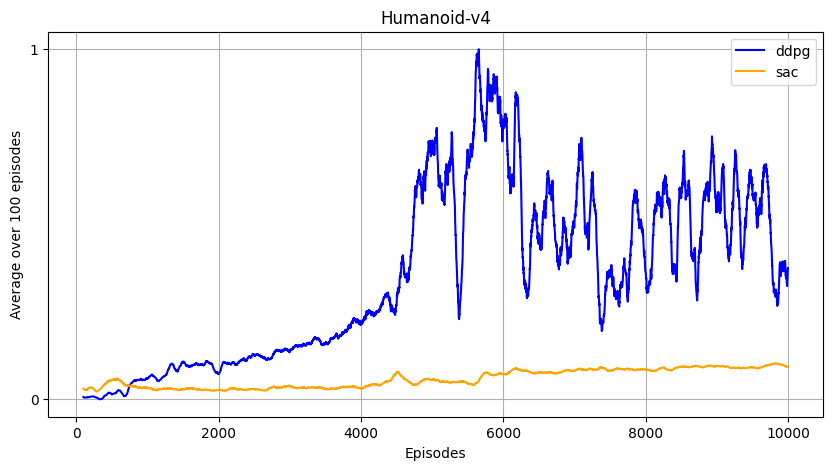

In [118]:
plot_compare_rewards(humanoid_ddpg_score_10k, humanoid_sac_score_10k, window=100, title='Humanoid-v4')

In [119]:
import os

In [122]:
sorted(os.listdir('models/Humanoid-v4'), reverse=True)

['5k ep', '50k ep', '1k ep', '113k ep', '10k ep', '100k ep']